# Timber Harvesting -- using 2 nodes

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdp01a.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-22</i>
<hr>

## About

Profit maximizing owner of a commercial tree stand must decide when to clearcut the stand.


In [1]:
import numpy as np
from compecon import NLP
import matplotlib.pyplot as plt

In [2]:
price = 1.0  # price of biomass
κ = 0.2  # clearcut-replant cost
smax  = 0.5  # stand carrying capacity
ɣ = 0.1  # biomass growth parameter
δ = 0.9  # discount factor

### Code the growth function

In [3]:
snodes = np.array([0.2, 0.4])

In [4]:
def h(s): return s + ɣ*(smax - s)

## SOLUTION

### Code the approximant and the residual

In [5]:
def vhat(c, s): return c[0] + c[1]*s
def vhat1(c,s): return price*s - κ + δ * vhat(c,h(0))
def vhat0(c,s): return δ * vhat(c, h(s))

def resid(c,s=snodes): return vhat(c,s) - np.maximum(vhat0(c,s), vhat1(c,s))

### Solve collocation equation

In [6]:
cc = NLP(resid).broyden(np.zeros(2))

### Compute critical biomass

In [7]:
scrit = NLP(lambda s: vhat0(cc,s)-vhat1(cc,s)).broyden(0.0)
scrit

0.36199999999813565

## ANALYSIS

### Compute refined state grid

In [8]:
ss = np.linspace(0,smax,1000)

### Plot Conditional Value Functions

Optimal Biomass Harvest Level = 0.3620


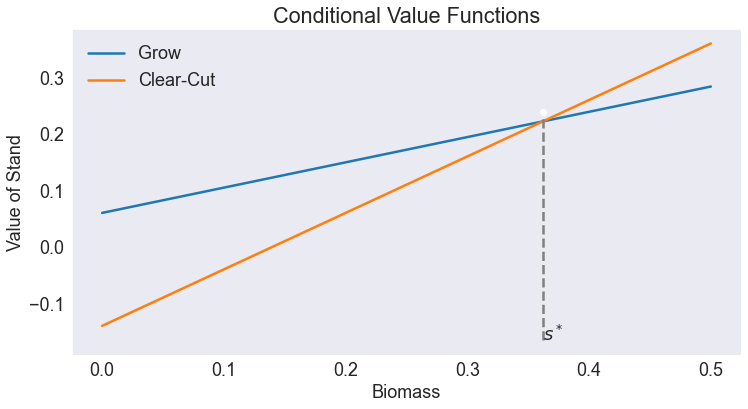

In [9]:
fig1, ax = plt.subplots()

ax.plot(ss,vhat0(cc,ss),label='Grow')
ax.plot(ss,vhat1(cc,ss),label='Clear-Cut')

ax.set(title='Conditional Value Functions',
       xlabel='Biomass',
       ylabel='Value of Stand')

ax.legend()

vcrit = vhat(cc,scrit)
ymin = ax.get_ylim()[0]
ax.vlines(scrit, ymin,vcrit,'grey',linestyles='--')
ax.annotate('$s^*$', [scrit,ymin])
ax.plot(scrit,vcrit, 'wo')

print(f'Optimal Biomass Harvest Level = {scrit:.4f}') 

### Plot Value Function Residual

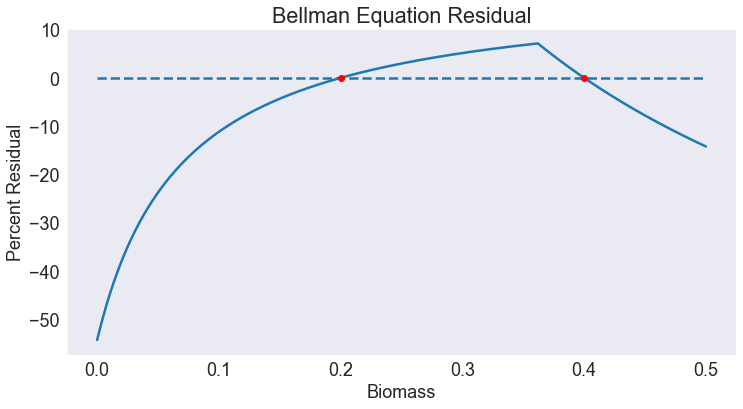

In [10]:
fig2, ax = plt.subplots()

ax.set(title='Bellman Equation Residual', 
       xlabel='Biomass',
       ylabel='Percent Residual')

ax.plot(ss, 100*resid(cc,ss) / vhat(cc,ss))
ax.hlines(0,0,smax,linestyles='--')
ax.plot(snodes,resid(cc),'ro')

### Compute ergodic mean annual harvest 

In [11]:
s = h(0)
for n in range(100):
    if s > scrit: break
    s = h(s)
    
print(f'Ergodic Mean Annual Harvest = {s/n:.4f} after {n+1} iterations') 

Ergodic Mean Annual Harvest = 0.0311 after 13 iterations
